### 라이브러리

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

* id : 개체 고유 ID
* 개체정보
    * father : 개체의 가계 고유 번호 (0 : Unknown)
    * mother : 개체의 모계 고유 번호 (0 : Unknown)
    * gender : 개체 성별 (0 : Unknown, 1 : female, 2 : male)
    * trait : 개체 표현형 정보 
* 15개의 SNP 정보 : SNP_01 ~ SNP_15
* class : 개체의 품종 (A,B,C)

In [26]:
data = pd.read_csv('./data/train.csv')

In [27]:
data # 262개의 데이터

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A G,A G,G A,G G,C A,G G,A


In [28]:
data.columns

Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class'],
      dtype='object')

In [29]:
data.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C


In [30]:
data.tail()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A G,A G,G A,G G,C A,G G,A
261,TRAIN_261,0,0,0,2,G G,A G,C A,G G,C C,...,A A,A A,A A,G G,A A,A A,G G,A A,G A,B


In [31]:
data.describe()

,father,mother,gender,trait
count,262.0,262.0,262.0,262.000000
mean,0.0,0.0,0.0,1.736641
std,0.0,0.0,0.0,0.441298
min,0.0,0.0,0.0,1.000000
25%,0.0,0.0,0.0,1.000000
50%,0.0,0.0,0.0,2.000000
75%,0.0,0.0,0.0,2.000000
max,0.0,0.0,0.0,2.000000


In [32]:
data.info() #결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      262 non-null    object
 1   father  262 non-null    int64 
 2   mother  262 non-null    int64 
 3   gender  262 non-null    int64 
 4   trait   262 non-null    int64 
 5   SNP_01  262 non-null    object
 6   SNP_02  262 non-null    object
 7   SNP_03  262 non-null    object
 8   SNP_04  262 non-null    object
 9   SNP_05  262 non-null    object
 10  SNP_06  262 non-null    object
 11  SNP_07  262 non-null    object
 12  SNP_08  262 non-null    object
 13  SNP_09  262 non-null    object
 14  SNP_10  262 non-null    object
 15  SNP_11  262 non-null    object
 16  SNP_12  262 non-null    object
 17  SNP_13  262 non-null    object
 18  SNP_14  262 non-null    object
 19  SNP_15  262 non-null    object
 20  class   262 non-null    object
dtypes: int64(4), object(17)
memory usage: 43.1+ KB


### 라벨 인코딩 & 원 핫 인코딩

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['SNP_01_Label'] = le.fit_transform(data['SNP_01'])
data['SNP_02_Label'] = le.fit_transform(data['SNP_02'])
data['SNP_03_Label'] = le.fit_transform(data['SNP_03'])
data['SNP_04_Label'] = le.fit_transform(data['SNP_04'])
data['SNP_05_Label'] = le.fit_transform(data['SNP_05'])
data['SNP_06_Label'] = le.fit_transform(data['SNP_06'])
data['SNP_07_Label'] = le.fit_transform(data['SNP_07'])
data['SNP_08_Label'] = le.fit_transform(data['SNP_08'])
data['SNP_09_Label'] = le.fit_transform(data['SNP_09'])
data['SNP_10_Label'] = le.fit_transform(data['SNP_10'])
data['SNP_11_Label'] = le.fit_transform(data['SNP_11'])
data['SNP_12_Label'] = le.fit_transform(data['SNP_12'])
data['SNP_13_Label'] = le.fit_transform(data['SNP_13'])
data['SNP_14_Label'] = le.fit_transform(data['SNP_14'])
data['SNP_15_Label'] = le.fit_transform(data['SNP_15'])

data['class_Label'] = le.fit_transform(data['class'])

In [34]:
sel = ["SNP_01","SNP_02","SNP_03","SNP_04","SNP_05","SNP_06","SNP_07","SNP_08","SNP_09","SNP_10",
        "SNP_11","SNP_12","SNP_13","SNP_14","SNP_15",'class']
data = data.drop(sel,axis=1)

In [35]:
data

,id,father,mother,gender,trait,SNP_01_Label,SNP_02_Label,SNP_03_Label,SNP_04_Label,SNP_05_Label,...,SNP_07_Label,SNP_08_Label,SNP_09_Label,SNP_10_Label,SNP_11_Label,SNP_12_Label,SNP_13_Label,SNP_14_Label,SNP_15_Label,class_Label
0,TRAIN_000,0,0,0,2,2,1,0,1,1,...,0,2,0,2,1,0,0,0,0,1
1,TRAIN_001,0,0,0,2,1,1,1,0,0,...,0,1,0,1,0,1,2,0,0,2
2,TRAIN_002,0,0,0,2,2,2,0,1,2,...,0,1,1,1,0,0,0,0,0,1
3,TRAIN_003,0,0,0,1,0,2,0,1,0,...,2,0,2,1,2,2,2,0,2,0
4,TRAIN_004,0,0,0,2,2,2,2,0,2,...,0,0,0,2,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,1,1,0,1,2,...,0,1,0,2,1,1,0,0,0,1
258,TRAIN_258,0,0,0,2,2,0,1,0,0,...,1,1,0,1,1,0,1,0,1,2
259,TRAIN_259,0,0,0,1,1,2,0,1,0,...,2,1,1,0,2,2,2,1,2,0
260,TRAIN_260,0,0,0,1,0,2,0,1,0,...,2,0,1,1,1,1,2,1,2,0


### 상관관계 시각화

C:\Users\JeongWoo\AppData\Local\Temp\ipykernel_12872\1809377440.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot:title={'center':'corr'}>

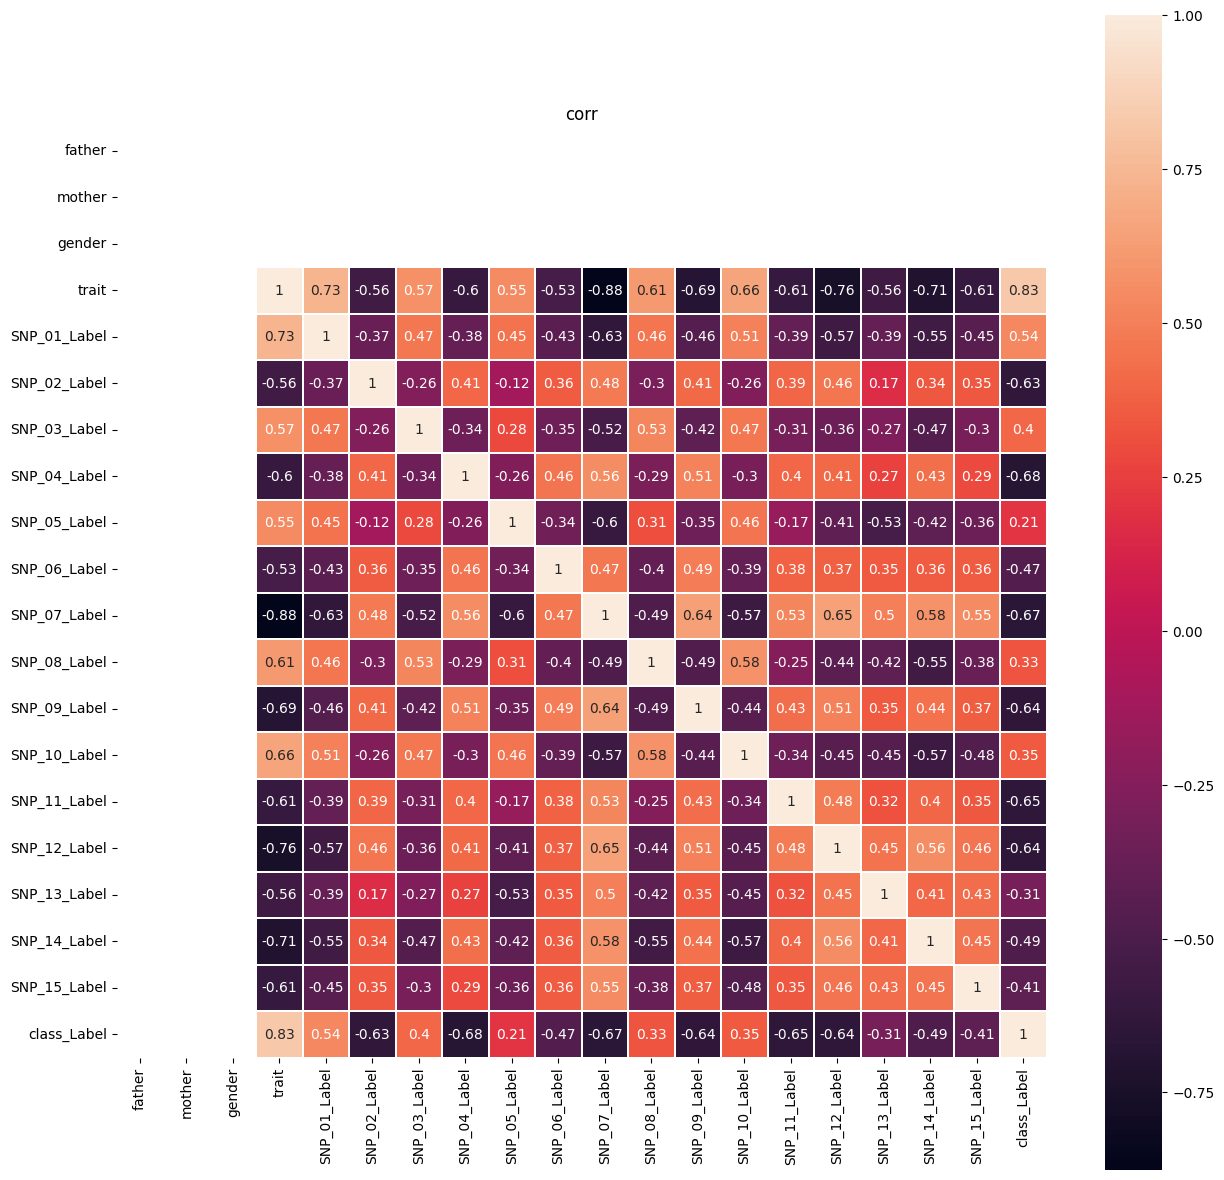

In [36]:
corr = data.corr()
corr
plt.style.use('default') # 비주얼 코드의 어두운 화면으로 사용하기 때문에 label값이 잘 보이지 않아서 사용
plt.figure(figsize=(15,15))
plt.title("corr")
sns.heatmap(corr,linewidths=0.1,square=True,annot=True)